# Convolutional Neural Network

### Importing the libraries

In [3]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import drive

In [4]:
drive.mount('/content/drive')

training_directory = '/content/drive/My Drive/4k_training_data_set'
test_directory = '/content/drive/My Drive/1k_test_data_set'
single_prediction_dir = 'dataset/single_prediction'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [7]:
training_set = train_datagen.flow_from_directory(
    training_directory,
    target_size=(64, 64),  # Resize to 64x64
    batch_size=32,
    class_mode='binary',  # Binary classification: dog vs cat
    color_mode='rgb'  # Ensure images are loaded as RGB
)

Found 8000 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(64, 64),  # Resize to 64x64
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'  # Ensure images are loaded as RGB
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Dropout(0.2))

### Step 1 - Convolution

In [10]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 2 - Pooling

In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding a second convolutional layer

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [13]:
model.add(Flatten())

### Step 4 - Full Connection

In [14]:
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

### Step 5 - Output Layer

In [15]:
model.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
pip install --upgrade tensorflow keras

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
# Set steps_per_epoch and validation_steps based on the size of the data
steps_per_epoch = training_set.samples // training_set.batch_size
validation_steps = test_set.samples // test_set.batch_size

# Ensure these values are at least 1 (to avoid running out of data)
steps_per_epoch = max(1, steps_per_epoch)
validation_steps = max(1, validation_steps)

model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=test_set,
    validation_steps=validation_steps
)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5124 - loss: 0.6988

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


## Part 4 - Making a single prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

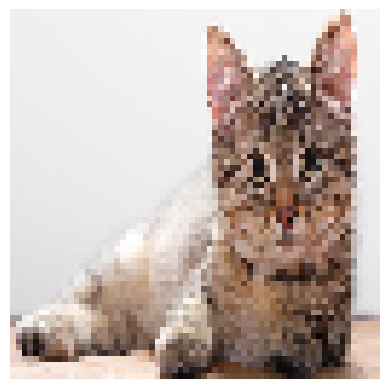

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: cat_or_dog_2.jpg -> Prediction: Dog


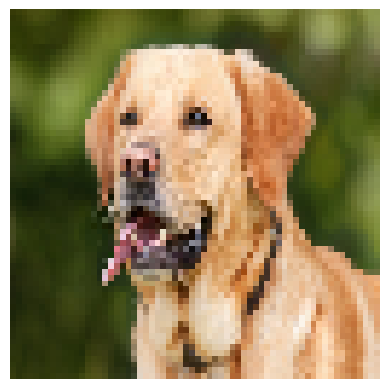

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: cat_or_dog_1.jpg -> Prediction: Dog


In [ ]:

def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(64, 64))
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return 'Dog'
    else:
        return 'Cat'

# Test predictions on images in the 'single_prediction' folder
for filename in os.listdir(single_prediction_dir):
    file_path = os.path.join(single_prediction_dir, filename)
    if os.path.isfile(file_path):
        result = predict_image(file_path, model)
        print(f"Image: {filename} -> Prediction: {result}")